In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,ifft

In [2]:
#Defining Parameters
L=128        #lENGTH OF PROFILE
Δx=1
x= np.arange(0,L,Δx)

A=1.0
M=1.0
Kappa=1.0

Δkx = 2*np.pi/L

Δt=1
T=1000
time=np.arange(0,T+Δt,Δt)

c_final=[]
time_tracker=[]

c_fdm=[]
time_fdm=[]

In [3]:
#%matplotlib notebook
#plt.figure(figsize = (8, 6))

c_integral=[]
count_array=[]

c= 0.5*(1+np.sin(2*np.pi*x/L))

#plt.plot(x,c,'r--',label='Initial Profile')
print('Average composition initially is '+str(np.average(c)))

n= len(x)

for t in time:
    
    g = 2*A*c*(1-c)*(1-2*c)
    
    g̃ = fft(g.real)
    c̃ = fft(c.real)
    
    for i in range(n):
        
        if i<= int(n/2):
            kx = i*Δkx
        else:
            kx = (i-n)*Δkx
            
        c̃[i] = (c̃[i] - Δt* M* kx**2 *g̃[i]) / (1+ 2*Δt* M* kx**4 *Kappa)
    
    c= ifft(c̃)
    
    
    if t!=0:
        if t%100==0:
            c_final.append(c.real)
            time_tracker.append(t)
    




Average composition initially is 0.5


In [4]:
Δt=0.05
T=1000
time=np.arange(0,T,Δt)
count=0

α = M*Δt/Δx**2
β = -2*Kappa*Δt / Δx**4

In [5]:
def delf(comp,i):
    return (2*A*comp[i]*(1-comp[i])*(1-2*comp[i]))

In [6]:
λ= np.arange(0,n)
c= 0.5*(1+np.sin(2*np.pi*x/L))
#plt.plot(x,c,'r--',label='Initial Profile')
#print('Average composition initially is '+str(np.average(c)))

cch= np.zeros(n)

for t in time:
    count+= 1
    for i in range(n):
        
        if i==0:
            cch[i] = c[i] + α*( delf(c,i+1)-2*delf(c,i) + delf(c,i-1+n)) + β*(c[i+2*1] - 4*c[i+1] + 6*c[i] - 4*c[i-1+n] + c[i-2*1+n] )
        #When i=0 then i-2= i-2+n   & i-1= i-1+n
        
        elif i==1:
            cch[i] = c[i] + α*( delf(c,i+1)-2*delf(c,i) + delf(c,i-1)) + β*(c[i+2*1] - 4*c[i+1] + 6*c[i] - 4*c[i-1] + c[i-2*1+n] )
        #When i=1 then i-2= i-2+n   
        
        elif i==(n-2):
            cch[i] = c[i] + α*( delf(c,i+1)-2*delf(c,i) + delf(c,i-1)) + β*(c[i+2*1-n] - 4*c[i+1] + 6*c[i] - 4*c[i-1] + c[i-2*1] )
        #When i=n-2 then i+2= i+2-n   
        
        elif i==(n-1):
            cch[i] = c[i] + α*( delf(c,i+1-n)-2*delf(c,i) + delf(c,i-1)) + β*(c[i+2*1-n] - 4*c[i+1-n] + 6*c[i] - 4*c[i-1] + c[i-2*1] )
        #When i=n-1 then i+2= i+2-n & i+1= i+1-n
        
        else:
            cch[i] = c[i] + α*( delf(c,i+1)-2*delf(c,i) + delf(c,i-1)) + β*(c[i+2*1] - 4*c[i+1] + 6*c[i] - 4*c[i-1] + c[i-2*1] )

            
    c= np.copy(cch)
    
    if (count*Δt)%100 ==0:
        c_fdm.append(c)
        time_fdm.append(count*Δt)

<IPython.core.display.Javascript object>


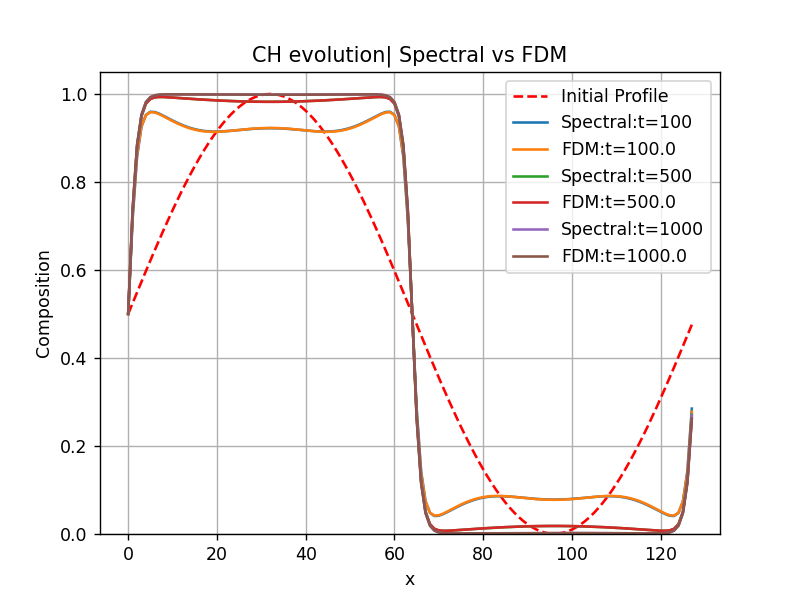

In [9]:
%matplotlib notebook
lis = [100,500,1000]

c= 0.5*(1+np.sin(2*np.pi*x/L))
plt.plot(x,c,'r--',label='Initial Profile')

for i in lis:
    for j in range(len(c_final)):
        
        if i == time_tracker[j]:
            plt.plot(x,c_final[j],label='Spectral:t='+str(time_tracker[j]))
            
        if i == time_fdm[j]:
            plt.plot(x,c_fdm[j],label='FDM:t='+str(time_fdm[j]))

plt.ylabel('Composition')
plt.title('CH evolution| Spectral vs FDM')
plt.xlabel('x')
plt.ylim(-0.0005,1.05)
plt.grid(True)
plt.legend()
plt.show()